Hey babe, let's try to complete this work together. :) 

I honestly wanted to be a lot active in this project but sadly my exams are just killing me :(

In [ ]:
# predict profit on each product of the 3 companies

# predict which products are going to make loss for the next year


In [ ]:

# linear regression
# ridge regression (less overfitting) (optimal parameters can be found by grid search and kfold cv)
# xgboost
# time series (ARIMA) to predict future profits
# RNN and LSTM (regression)
# RNN and LSTM (time series)

In [ ]:
# no of products with loss = 20016

# no of products with profit = 86448

# no of products with no profit and no loss = 736


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
# sorry babe in my directory name, everything is same except it is "Colab Notebooks" (no underscore), so we need to change to run 

dataset=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Projects/D2C/train.csv", parse_dates=['delivery date', 'placement date'])
pd.set_option('display.max_columns', None)
#babe you can use you own loading process to load the dataset.
#we can also not parse the dates and treat them as normal columns
dataset.head(6)

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
0,1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01
1,2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01
2,3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01
3,4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01
4,5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01
5,6,Westland,0.1,247.716,4,Central,kariox,Consumer,battery,Standard Class,6330,93.5816,2018-01-01,48185,Michigan,2018-01-01


In [ ]:
dataset.tail(6)

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
6694,6695,Jackson,0.0,619.950,5,Central,fynota,Home Office,chocolates,Standard Class,2681,111.5910,2021-01-01,49201,Michigan,2021-01-01
6695,6696,Burlington,0.0,542.940,3,East,kariox,Consumer,battery,Standard Class,9389,152.0232,2021-01-01,5408,Vermont,2021-01-01
6696,6697,San Jose,0.2,276.784,2,West,kariox,Corporate,headset,Standard Class,9597,89.9548,2021-01-01,95123,California,2021-01-01
6697,6698,Burlington,0.0,2.040,1,East,kariox,Consumer,watch,Standard Class,9390,0.9588,2021-01-01,5408,Vermont,2021-01-01
6698,6699,New York City,0.1,207.846,3,East,qexty,Corporate,tshirts,Second Class,440,2.3094,2021-01-01,10024,New York,2021-01-01
6699,6700,Los Angeles,0.2,160.776,3,West,fynota,Consumer,colddrinks,Standard Class,1659,10.0485,2021-01-01,90045,California,2021-01-01


In [14]:
dataset.info() # info about dataset, contains only 1 null values at delivery type :)
dataset['delivery type']=dataset['delivery type'].fillna(value=dataset['delivery type'].mode()[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               6700 non-null   int64         
 1   departure city   6700 non-null   object        
 2   discount         6700 non-null   float64       
 3   price            6700 non-null   float64       
 4   no of items      6700 non-null   int64         
 5   location         6700 non-null   object        
 6   class            6700 non-null   object        
 7   segment          6700 non-null   object        
 8   sub-class        6700 non-null   object        
 9   delivery type    6699 non-null   object        
 10  RID              6700 non-null   int64         
 11  profit           6700 non-null   float64       
 12  delivery date    6700 non-null   datetime64[ns]
 13  address code     6700 non-null   int64         
 14  departure state  6700 non-null   object 

In [15]:
Y=dataset['profit']
# dataset without profit col is given a separate name
X=dataset.drop(['profit', 'address code', 'RID', 'id'], axis=1)
#X.info() #no null values :) he he

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(dataset, Y, test_size=0.2, random_state=9)
print("train size, test size=", x_train.size, x_test.size)

train size, test size= 85760 21440


Visualizing..

In [ ]:
# these are some sample eda that we can perform and may also help us :))

# no of items delivered on each date (line graph)
# profit on each date (line graph)
# loss on each date (line graph)
# no of items delivered on monthly basis (line graph)
# profit on monthly basis (line graph)
# loss on monthly basis (line graph)

# subclass(the element) delivered monthly (bar chart)
# class (which company) delivered monthly (bar chart)

#monthly profit by each class (line graph)
#monthly loss by each class (line graph)

#count of subclass for each class (bar chart for each class)

#variation of profits based on product prices (box plots or line graphs)
# variation of profits based on product discounts (box plots)

#variation of profits with delivery dates

There are 17 items


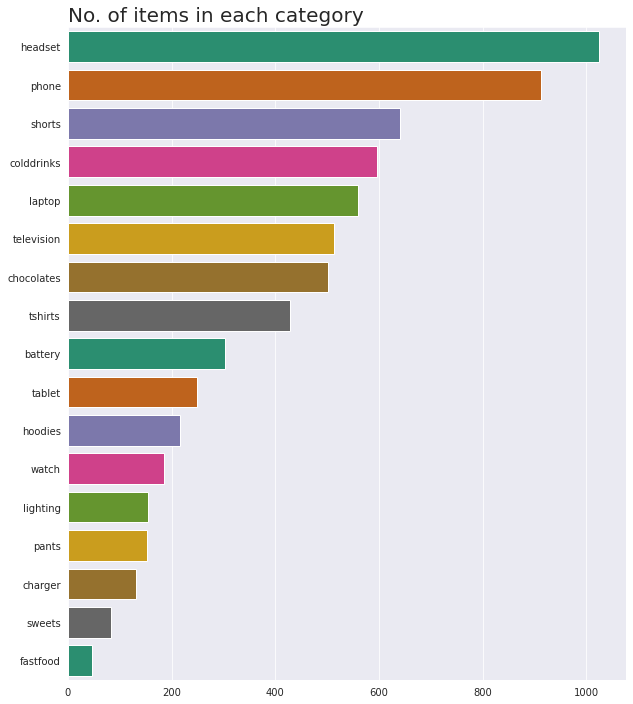

In [9]:
#No. of items in each category
count_df = pd.DataFrame(dataset['sub-class'].value_counts()).reset_index()
print('There are', len(count_df), 'items')

sns.set_style('darkgrid')
plt.figure(figsize=(10, 12))
sns.barplot(data=count_df, y='index', x='sub-class', palette='Dark2')
plt.title('No. of items in each category', loc='left', fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [10]:
count_df

,index,sub-class
0,headset,1025
1,phone,913
2,shorts,641
3,colddrinks,597
4,laptop,559
5,television,513
6,chocolates,502
7,tshirts,428
8,battery,303
9,tablet,250


mean profit VS delivery date (*whole dataset*)

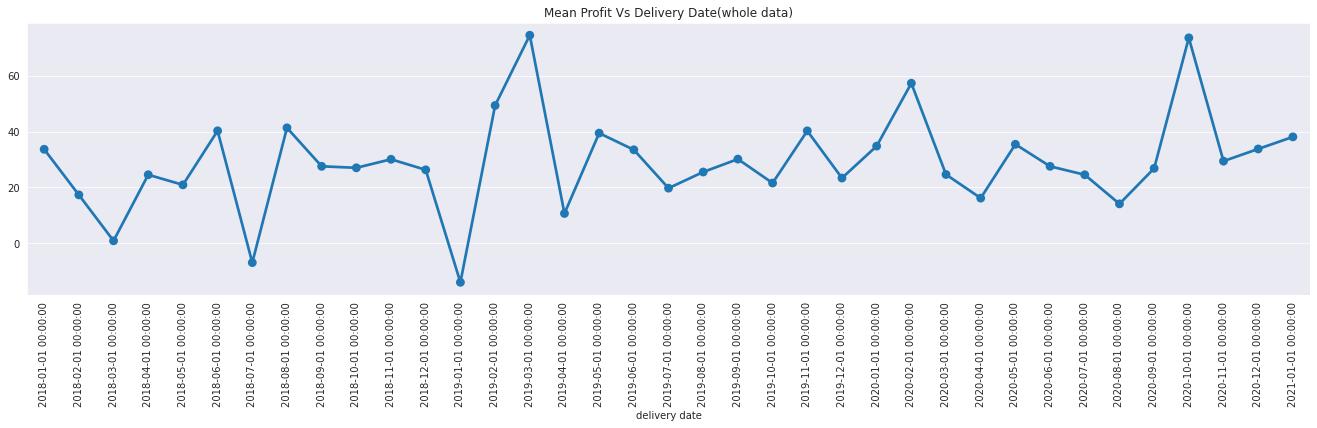

In [11]:
# mean profit vs delivery date

plt.figure(figsize=(23,5))
delivery_date_profit_mean=dataset.groupby('delivery date')['profit'].mean()
sns.pointplot(x=delivery_date_profit_mean.index,y=delivery_date_profit_mean.values)
plt.title('Mean Profit Vs Delivery Date(whole data)')
plt.xticks(rotation = 90)
plt.show()
#no periodic trend found, not a time series

mean profit VS placement date (*whole dataset*)

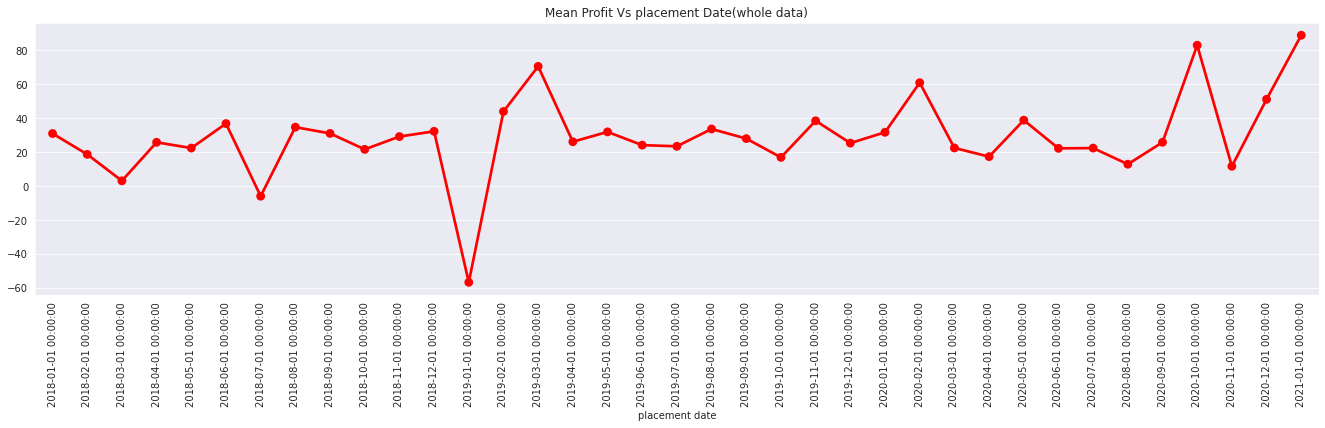

In [12]:
plt.figure(figsize=(23,5))
placement_date_profit_mean=dataset.groupby('placement date')['profit'].mean()
sns.pointplot(x=placement_date_profit_mean.index,y=placement_date_profit_mean.values, color="red")
plt.title('Mean Profit Vs placement Date(whole data)')
plt.xticks(rotation = 90)
plt.show()
#no periodic trend found, not a time series. Not found in whole dataset, so conclusion stands can not be present in trainset

In [ ]:
# mean of no of items bought on each delivery date

plt.figure(figsize=(23,5))
delivery_date_items_mean=dataset.groupby('delivery date')['no of items'].mean()
sns.pointplot(x=delivery_date_items_mean.index,y=delivery_date_items_mean.values)
plt.title('Mean of no of Items Vs Delivery Date')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# mean profit by each class(sub company)


plt.figure(figsize=(23,5))
company_profit_mean=dataset.groupby('class')['profit'].mean()
sns.pointplot(x=company_profit_mean.index,y=company_profit_mean.values)
plt.title('Mean Profit Vs Company')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
# trying a boxplot for company vs profit (not mean profit) 
plt.figure(figsize=(15,10))
sns.boxplot(x=dataset['class'], y=dataset['profit'])

In [ ]:
# boxplot for item vs profit (not mean profit) 
plt.figure(figsize=(15,10))
sns.boxplot(x=dataset['sub-class'], y=dataset['profit'])

Text(0.5, 1.0, 'normality of prices')

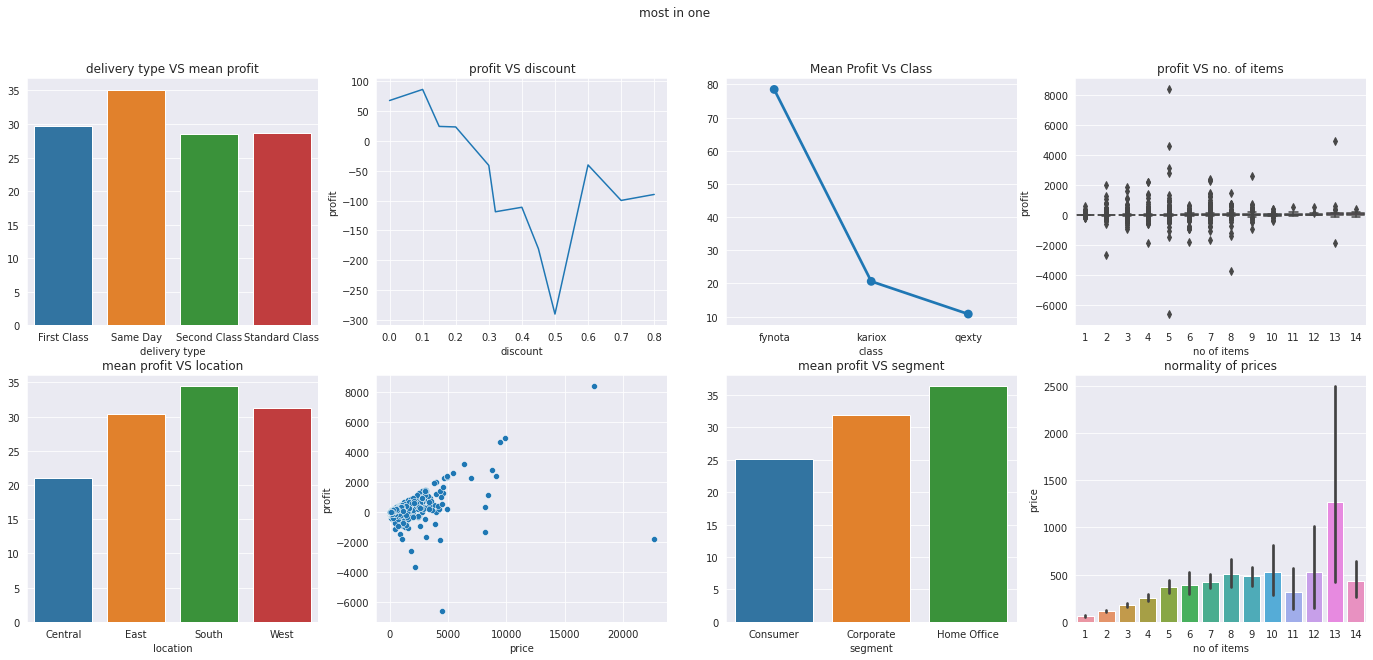

In [13]:
dmp=dataset.groupby('delivery type')['profit'].mean()
company_profit_mean=dataset.groupby('class')['profit'].mean()


fig, axes = plt.subplots(nrows=2 ,ncols= 4,  figsize=(24, 10))
fig.suptitle('most in one')
#0
sns.barplot(ax=axes[0, 0], x=dmp.index, y=dmp.values)
axes[0, 0].set_title("delivery type VS mean profit")

#1
sns.lineplot(ax=axes[0, 1], x= dataset.groupby(dataset.discount).mean().index, 
             y = dataset.groupby(dataset.discount).mean()['profit'])
axes[0, 1].set_title("profit VS discount")

#2
sns.pointplot(ax=axes[0, 2], x=company_profit_mean.index,y=company_profit_mean.values)
axes[0, 2].set_title('Mean Profit Vs Class')

#3
sns.barplot(ax=axes[1, 0], x=dataset.groupby('location')['profit'].mean().index, y=dataset.groupby('location')['profit'].mean().values)
axes[1, 0].set_title("mean profit VS location")

#4
sns.scatterplot(ax=axes[1,1], x=dataset['price'], y=Y)

#5
sns.barplot(ax=axes[1,2], x=dataset.groupby('segment')['profit'].mean().index, y=dataset.groupby('segment')['profit'].mean().values)
axes[1,2].set_title("mean profit VS segment")

#6
sns.boxplot(ax=axes[0,3], x=dataset['no of items'], y=Y)
axes[0,3].set_title("profit VS no. of items")

#7 add price VS no. of items to check normality of price column values.
sns.barplot(ax=axes[1,3], x=dataset['no of items'], y=dataset['price'])
axes[1,3].set_title("normality of prices")

In [17]:
#the number of unique values in categorial columns useful for encoding later
categorical_data = X.select_dtypes(include='object')
col=list(categorical_data.columns)
print("the number of unique values are:\n")
for c in col:
  print(c, categorical_data[c].nunique())
X.describe()

the number of unique values are:

departure city 469
location 4
class 3
segment 3
sub-class 17
delivery type 4
departure state 47


,discount,price,no of items
count,6700.000000,6700.000000,6700.000000
mean,0.155876,234.424275,3.798507
std,0.205922,641.440815,2.225327
min,0.000000,0.836000,1.000000
25%,0.000000,17.340000,2.000000
50%,0.200000,54.960000,3.000000
75%,0.200000,212.940000,5.000000
max,0.800000,22638.480000,14.000000


**Conclusions: before preprocess**

---


*   dropped id, RID, address code(it represents the same departure state)
*   No trends with dates, not time series analysis. Each row can be grouped
    by dates e.g all 2018 years can be replaced with 0, 2019 years with 1...
    Months can also be taken into account for better precision eg. 02-2018=2, 02-2019=14... since we don't
    have idea if the model will overfit or not due to months, it will be experimental. one will be without months and only years and another with months
    as well as years. The one with the best accuracy will be selected.
*   departure city has 47 unique values, high variance in categorical, can be neglected. Experimental inclusion-exclusion.
*   no need to scale discount lies between 0 and 1
*   according to feature co relation scatterplot price do follows a normal distribution, so we can go with standardizing the values instead of min-max scaling.
* no of items can be left as it is
* all locations nearly have same impact on profits, no superiority OHE
* class- fynota has highest mean profit can be give highest priority, so
  ordinal encoding, fynota=2, kariox=0, quexty=-1 just to give some priority    accroding to the graph.
* segment also has almost equal contibution for profit so OHE
* sub-class has 17 different values so maybe label encoding or OHE(you say)
* delivery type is OHE
* departure state has 47 diff values so maybe label encoding


---






array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f05ddccd0>,
      dtype=object)

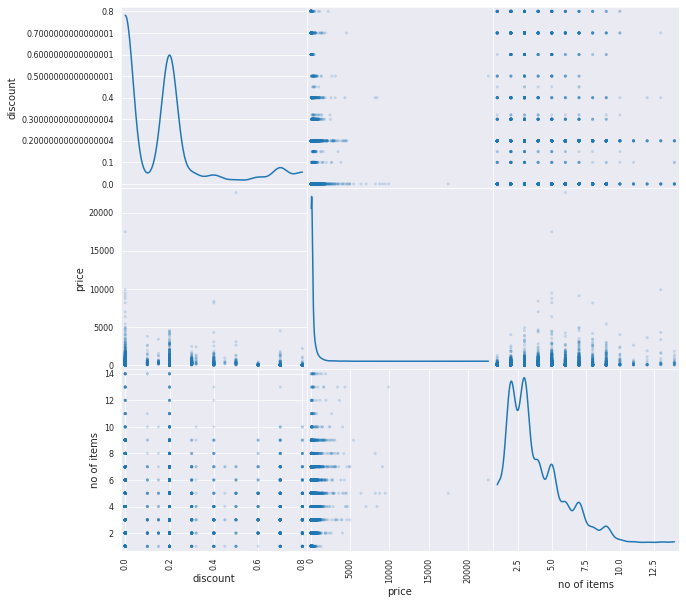

In [15]:
#plot to study inter feature corealation
from pandas.plotting import scatter_matrix
scatter_matrix(X, alpha=0.2, figsize=(10, 10), diagonal='kde')

In [16]:
# for i in range(len(X['placement date'])):
#   date=X['placement date'][i]
#   if date.year==2018:
#     X['placement date'][i]=0
#   elif date.year==2019:
#     X['placement date'][i]=1
#   elif date.year==2020:
#     X['placement date'][i]=2
#   else:
#     X['placement date'][i]=3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: Sett

In [17]:
X.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,delivery date,departure state,placement date
0,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,2018-01-01,Texas,0
1,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,2018-01-01,Michigan,0
2,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,2018-01-01,Michigan,0
3,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,2018-01-01,Michigan,0
4,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,2018-01-01,Michigan,0


In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
ss, ms=StandardScaler(), MinMaxScaler()
le, ohe=LabelEncoder(), OneHotEncoder()

def process_to_matrix(data):
  #replacing date years with int to give chronological advantage

  for i in range(len(data['delivery date'])):
    date=data['delivery date'][i]
    if date.year==2018:
      data['delivery date'][i]=0
    elif date.year==2019:
      data['delivery date'][i]=1
    elif date.year==2020:
      data['delivery date'][i]=2
    else:
      data['delivery date'][i]=3
  
  # same for placement date
  for i in range(len(data['placement date'])):
    date=data['placement date'][i]
    if date.year==2018:
      data['placement date'][i]=0
    elif date.year==2019:
      data['placement date'][i]=1
    elif date.year==2020:
      data['placement date'][i]=2
    else:
      data['placement date'][i]=3
  
  data=data.drop(['departure city'], axis=1)
  data['sub-class']=le.fit_transform(data['sub-class']) # label encoding the items
  data['class']=data['class'].replace(["fynota", 'kariox', 'qexty'],  (2, 0, -1))

  data=data.values

  ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3, 5, 7, 9])], remainder='passthrough') # feature 4 is at column index =2, so we passed 2 to be OHE
  #ohe delivery type, departure state, segment , location
  data=ct.fit_transform(data)

  return data

  #yearlist=dataset['delivery date'].dt.year[6000]
  #print(yearlist)

In [19]:
# dont run this cell twice...cause year is already OHEncoded..and date.year doesnt exist anymore
X_matrix=process_to_matrix(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher

In [24]:
X.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,delivery date,departure state,placement date
0,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,0,Texas,0
1,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,0,Michigan,0
2,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,0,Michigan,0
3,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,0,Michigan,0
4,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,0,Michigan,0


In [25]:
X.tail()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,delivery date,departure state,placement date
6695,Burlington,0.0,542.940,3,East,kariox,Consumer,battery,Standard Class,3,Vermont,3
6696,San Jose,0.2,276.784,2,West,kariox,Corporate,headset,Standard Class,3,California,3
6697,Burlington,0.0,2.040,1,East,kariox,Consumer,watch,Standard Class,3,Vermont,3
6698,New York City,0.1,207.846,3,East,qexty,Corporate,tshirts,Second Class,3,New York,3
6699,Los Angeles,0.2,160.776,3,West,fynota,Consumer,colddrinks,Standard Class,3,California,3


In [20]:
X_matrix.shape

(6700, 65)

In [21]:
x_train_matrix=process_to_matrix(x_train) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1060: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_labels(key, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


KeyError: ignored

In [ ]:
#standardizing price col

